In [1]:
from keras_vggface.vggface import VGGFace
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input
from keras.preprocessing import image
import numpy as np
import os
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [2]:
model = VGGFace(model='resnet50', include_top=False, input_shape=(224, 224, 3), pooling='avg')


In [3]:
model.summary()

Model: "vggface_resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1/7x7_s2 (Conv2D)           (None, 112, 112, 64) 9408        input_1[0][0]                    
__________________________________________________________________________________________________
conv1/7x7_s2/bn (BatchNormaliza (None, 112, 112, 64) 256         conv1/7x7_s2[0][0]               
__________________________________________________________________________________________________
activation (Activation)         (None, 112, 112, 64) 0           conv1/7x7_s2/bn[0][0]            
___________________________________________________________________________________

In [4]:
def feature_extractor(img_path , model):
    img = image.load_img(img_path , target_size= (224,224))
    img_array = image.img_to_array(img)

    expanded_img = np.expand_dims(img_array,axis=0) # Insert a new axis that will appear at the axis position in the expanded array shape.

    preprocessed_img = preprocess_input(expanded_img)

    return model.predict(preprocessed_img)



In [5]:
os.getcwd()

'd:\\vscode_machineLearning\\BEST_PROJECTS\\face-match\\experiments'

In [6]:
os.chdir('d:\\vscode_machineLearning\\BEST_PROJECTS\\face-match')

In [7]:
os.getcwd()

'd:\\vscode_machineLearning\\BEST_PROJECTS\\face-match'

In [8]:
df = pd.read_csv(filepath_or_buffer=r'data_path\data_path.csv',index_col=False)
df = df.drop(columns='Unnamed: 0')

In [9]:
df

,img_path
0,data\Aamir_Khan\Aamir.100.jpg
1,data\Aamir_Khan\Aamir.101.jpg
2,data\Aamir_Khan\Aamir.103.jpg
3,data\Aamir_Khan\Aamir.105.jpg
4,data\Aamir_Khan\Aamir.106.jpg
...,...
8659,data\Zareen_Khan\Zareen_Khan.91.jpg
8660,data\Zareen_Khan\Zareen_Khan.92.jpg
8661,data\Zareen_Khan\Zareen_Khan.93.jpg
8662,data\Zareen_Khan\Zareen_Khan.94.jpg


In [10]:
df['img_path'][0]

'data\\Aamir_Khan\\Aamir.100.jpg'

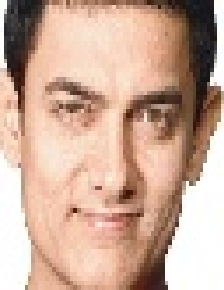

In [11]:
image.load_img(df['img_path'][0] , target_size= (290,224))

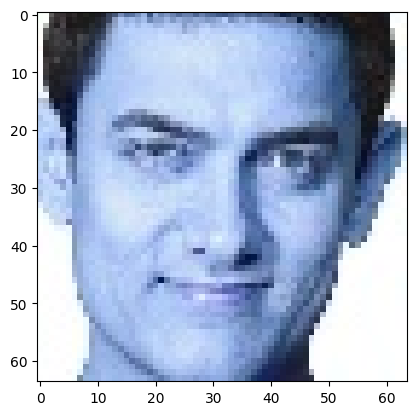

In [12]:
plt.imshow(cv2.imread(df['img_path'][0])) ## this also works.

In [13]:
image.img_to_array(image.load_img(df['img_path'][0] , target_size= (290,224)))

array([[[249., 255., 249.],
        [249., 255., 249.],
        [249., 255., 249.],
        ...,
        [255., 254., 250.],
        [255., 254., 250.],
        [255., 254., 250.]],

       [[249., 255., 249.],
        [249., 255., 249.],
        [249., 255., 249.],
        ...,
        [255., 254., 250.],
        [255., 254., 250.],
        [255., 254., 250.]],

       [[249., 255., 249.],
        [249., 255., 249.],
        [249., 255., 249.],
        ...,
        [255., 254., 250.],
        [255., 254., 250.],
        [255., 254., 250.]],

       ...,

       [[254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.],
        ...,
        [254., 255., 255.],
        [254., 255., 255.],
        [254., 255., 255.]],

       [[254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.],
        ...,
        [254., 255., 255.],
        [254., 255., 255.],
        [254., 255., 255.]],

       [[254., 254., 254.],
        [254., 254., 254.],
        [254., 2

> ##### Before applying np.expand_dims-> (height, width, channels)
>##### After applying np.expand_dims-> (1,height, width, channels) (The 1 at the beginning indicates that the image data now forms a batch of one image. Because I want to feed the images in the neural network thats why I am doing this.)


In [14]:
# cv2.imread(df['img_path'][0])
np.expand_dims(image.img_to_array(image.load_img(df['img_path'][0] , target_size= (290,224))),axis=0)

array([[[[249., 255., 249.],
         [249., 255., 249.],
         [249., 255., 249.],
         ...,
         [255., 254., 250.],
         [255., 254., 250.],
         [255., 254., 250.]],

        [[249., 255., 249.],
         [249., 255., 249.],
         [249., 255., 249.],
         ...,
         [255., 254., 250.],
         [255., 254., 250.],
         [255., 254., 250.]],

        [[249., 255., 249.],
         [249., 255., 249.],
         [249., 255., 249.],
         ...,
         [255., 254., 250.],
         [255., 254., 250.],
         [255., 254., 250.]],

        ...,

        [[254., 254., 254.],
         [254., 254., 254.],
         [254., 254., 254.],
         ...,
         [254., 255., 255.],
         [254., 255., 255.],
         [254., 255., 255.]],

        [[254., 254., 254.],
         [254., 254., 254.],
         [254., 254., 254.],
         ...,
         [254., 255., 255.],
         [254., 255., 255.],
         [254., 255., 255.]],

        [[254., 254., 254.],
       

In [15]:
np.expand_dims(image.img_to_array(image.load_img(df['img_path'][0] , target_size= (290,224))),axis=0).shape

(1, 290, 224, 3)

In [16]:
preprocess_input(np.expand_dims(image.img_to_array(image.load_img(df['img_path'][0] , target_size= (290,224))),axis=0)) 
#This function preprocesses the input image array according to the requirements of the specific pre-trained model

array([[[[155.406   , 150.23761 , 119.813705],
         [155.406   , 150.23761 , 119.813705],
         [155.406   , 150.23761 , 119.813705],
         ...,
         [156.406   , 149.23761 , 125.813705],
         [156.406   , 149.23761 , 125.813705],
         [156.406   , 149.23761 , 125.813705]],

        [[155.406   , 150.23761 , 119.813705],
         [155.406   , 150.23761 , 119.813705],
         [155.406   , 150.23761 , 119.813705],
         ...,
         [156.406   , 149.23761 , 125.813705],
         [156.406   , 149.23761 , 125.813705],
         [156.406   , 149.23761 , 125.813705]],

        [[155.406   , 150.23761 , 119.813705],
         [155.406   , 150.23761 , 119.813705],
         [155.406   , 150.23761 , 119.813705],
         ...,
         [156.406   , 149.23761 , 125.813705],
         [156.406   , 149.23761 , 125.813705],
         [156.406   , 149.23761 , 125.813705]],

        ...,

        [[160.406   , 149.23761 , 124.813705],
         [160.406   , 149.23761 , 124.813705]

In [17]:
preprocess_input(np.expand_dims(image.img_to_array(image.load_img(df['img_path'][0] , target_size= (290,224))),axis=0)).shape

(1, 290, 224, 3)

In [18]:
model.predict(preprocess_input(np.expand_dims(image.img_to_array(image.load_img(df['img_path'][0] , target_size= (224,224))),axis=0)))## 
# This method takes the input data, performs forward propagation through the pre-trained deep learning model, and generates predictions for the input data

array([[0.       , 0.3215958, 0.       , ..., 5.9016385, 0.       ,
        1.5431414]], dtype=float32)

## unpickling the file

In [19]:
import pickle

In [20]:
file_path = pickle.load(file=open(file=r'model/img_files_path.pkl',mode='rb'))

In [21]:
file_path

['data\\Aamir_Khan\\Aamir.100.jpg',
 'data\\Aamir_Khan\\Aamir.101.jpg',
 'data\\Aamir_Khan\\Aamir.103.jpg',
 'data\\Aamir_Khan\\Aamir.105.jpg',
 'data\\Aamir_Khan\\Aamir.106.jpg',
 'data\\Aamir_Khan\\Aamir.111.jpg',
 'data\\Aamir_Khan\\Aamir.112.jpg',
 'data\\Aamir_Khan\\Aamir.113.jpg',
 'data\\Aamir_Khan\\Aamir.115.jpg',
 'data\\Aamir_Khan\\Aamir.116.jpg',
 'data\\Aamir_Khan\\Aamir.118.jpg',
 'data\\Aamir_Khan\\Aamir.120.jpg',
 'data\\Aamir_Khan\\Aamir.121.jpg',
 'data\\Aamir_Khan\\Aamir.123.jpg',
 'data\\Aamir_Khan\\Aamir.125.jpg',
 'data\\Aamir_Khan\\Aamir.128.jpg',
 'data\\Aamir_Khan\\Aamir.129.jpg',
 'data\\Aamir_Khan\\Aamir.130.jpg',
 'data\\Aamir_Khan\\Aamir.132.jpg',
 'data\\Aamir_Khan\\Aamir.134.jpg',
 'data\\Aamir_Khan\\Aamir.142.jpg',
 'data\\Aamir_Khan\\Aamir.144.jpg',
 'data\\Aamir_Khan\\Aamir.151.jpg',
 'data\\Aamir_Khan\\Aamir.153.jpg',
 'data\\Aamir_Khan\\Aamir.158.jpg',
 'data\\Aamir_Khan\\Aamir.161.jpg',
 'data\\Aamir_Khan\\Aamir.163.jpg',
 'data\\Aamir_Khan\\Aamir.16

## Detect FAces